## Stablo odlučivanja u strojnom učenju

Stabla odlučivanja koriste se u analizi odlučivanja kako bi se vizualno predstavio način donošenja odluka od strane ekperata. Takva stabla odlučivanja opisuju način kako ljudski ekperti dolaze do odluke kod nekog problema odlučivanja.
Druga primjena stabla odlučivanja, koju ćemo ovdje obraditi, je njihova upotreba kao prediktivni modeli u strojnom učenju.

Stablo odlučivanja kreira se na temelju poznatih podataka *training set*, te se kasnije koristi kako bi se predvidjeli, odnosno klasificirali novi podaci.

#### Primjer korišteja stabla odlučivanja na zahtjevima za kreditima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

df = pd.read_csv('kredit.csv', index_col=False)
df_novi = pd.read_csv('zahtjev.csv', index_col=False)
df_novi.replace(math.nan, '', regex=True, inplace=True)

Pretpostavimo da smo promatranjem korisnika za zahtjev kredita došli do sljedećih podataka:

In [2]:
df

,dob,ima_posao,ima_kucu,kreditni_status,kredit_odobren
0,mlad,ne,ne,loš,ne
1,mlad,ne,ne,dobar,ne
2,mlad,da,ne,dobar,da
3,mlad,da,da,loš,da
4,mlad,ne,ne,loš,ne
5,srednje_g,ne,ne,loš,ne
6,srednje_g,ne,ne,dobar,ne
7,srednje_g,da,da,dobar,da
8,srednje_g,ne,da,izvrstan,da
9,srednje_g,ne,da,izvrstan,da


Te smo kreirali sljedeće stablo odlučivanja:

<img src="files/stablo_krediti.png" width=400px>
Čvorovi stabla koji nisu listovi predstavljaju varijable, grane ili bridovi stabla predavljaju vrijednosti varijabli, dok  listovi stabla predtavljaju konačnu odluku ili klasu.


Odlučujemo pomoću stabla odlučivanja o novom zahtjevu za kredit, koji ima sljedeće informacije o podnositelju:

In [3]:
df_novi

,dob,ima_posao,ima_kucu,kreditni_status,kredit_odobren
0,mlad,ne,ne,loš,


<img src="files/stablo_krediti_odluka.png" width=400px>
Kako je korisnikova dob *mlad* i nema posao, kredit nije odobren. 


### Određivanje stabla odlučivanja

Stablo odlučivanja nije jedinstveno te se postavlja pitanje kako odrediti stablo odlučivanja, tj. koje stablo je "najbolje"?
Nalaženje bajboljeg stabla je NP-teško, i svi današnji algoritmi konstrukcije stabla su heuristički. 

##### Opis osnovnog algoritma 
* pretopstavi da su svi atributi diskretni (inače radimo diskretizaciju nad podacima)
* stablo se konstruira od vrha prema dnu u rekurzivnom postupku
* na početku, svi primjeri za treniranje su u korijenu
* primjeri se particioniraju rekurzivno, bazirano na odabranim atributima
* atributi se selektiraju na osnovi funkcije "nečistoće"
Uvijeti za kraj particioniranja:
* svi primjeri za dani čvor pripadaju istoj klasi 
* nema više atributa za daljnje particioniranje - većinska klasa je list
* nema više preostalih primjera 

##### Diskretizaciji
Neprekidni atributi se u svakom čvoru rastavi na dva ili više intervala. Za nalaženje praga koristi se dobitak ili omjer dobitka na informaciji slično kao i kod određivanja atributa za particioniranje. Alternativno promjena ide samo između vrijednosti atributa kod kojih dolazi do promjene klase.

##### Izbor atributa za particioniranje
Različiti algoritmi kod konstruiranje stabla koriste različite metrike za određivanje najboljeg atrubuta za granenje. Mi ćemo ovdje spomenuti dvije najčešće korištene a to su:

###### *Gini impurity* (Ginijeva nečistoča)
Da bi izračunali *Gini impurity* skupa od $J$ klasa, gdje je $i \in \{1,2,...,J\}$ i $p_i$ broj pojavljivanja elemenata klase $i$ u skupu, koristimo formulu:
$$ I_G(p)=1-\sum_{i=1}^{J}p_{i} ^j $$

###### *Information gain* (Dobitak informacija)
Dan je skup primjera $D$. Prvo izračunamo njegovu entropiju:
$$ entropija(D)=-\sum_{j=1}^{|C|}Pr(c_{j})log_{2}(Pr(c_{j})) $$

Ako atribut $A_i$ s $v$ vrijednosti, uzmemo kao korijen trenutnog stabla, to particionira skup $D$ u $v$ podskupova $D_1, D_2, ..,D_v$ prema vrijednostima atributa $A_i$

Očekivana entropija, ako je $A_i$ uzet kao trenutni korijen, je:
$$entropija_{A_i}(D) = \sum_{j=1}^v \frac{|D_j|}{|D|} * enropija(D_j) $$
To je prosječna entropija preko svih skupova $D_j$.

I na kraju *information gain* dobiven odabirom baš tog atributa $A_i$ za grananje ili particiju je:

$$dobitak(D, A_i) = entropija(D) - entropija_{A_i}(D)$$


**Primjer - Shannonova entropija, bacanje simetričnog novčića** <br>
Booleova varijabla, vjerojatnost za $true$ je $p$

C:\Users\Tomislav\Anaconda3\envs\ms\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Tomislav\Anaconda3\envs\ms\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


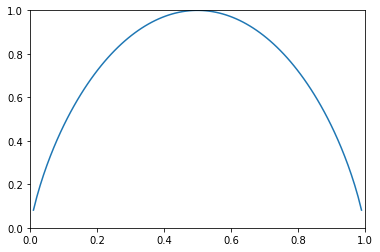

In [4]:
fig, axes = plt.subplots()
p = np.linspace(0,1,100)
axes.plot(p, -p*np.log2(p) - (1-p)*np.log2(1-p));
plt.ylim([0, 1]);
plt.xlim([0, 1]);

### Primjeri

In [5]:
def partition(daFrame, column):
    """Vraća particiju skupa s obzirom na vrijednosti column parametra. Povratna vrijednost je lista DataFrame objekata"""
    ret = [];
    for x in daFrame[column].unique():
        ret.append(pd.DataFrame(daFrame.loc[daFrame[column] == x]))
    return ret;

In [6]:
def entropy(s):
    """Računa entropiju skupa s"""
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    for p in freqs:
        if p != 0.0:
            res -= p * math.log(p, 2)
    return res

In [7]:
def attribute_entropy(skup, attribute_split,attribute_target):
    """Računa entropiju ako je attribute_split uzet kao korijen"""
    suma = 0;
    part =partition(skup, attribute_split)
    row_count = skup[attribute_target].count()    
    for x in part:
        suma +=  (len(list(x[attribute_split]))/row_count)* entropy(list(x[attribute_target]))
    return suma

In [8]:
def information_gain(skup, attribute_split,attribute_target ):
    """Računa dobitak na informaciji ako je attribute_split uzet kao korijen"""
    return entropy(list(skup[attribute_target])) - attribute_entropy(skup, attribute_split,attribute_target) 

In [9]:
df_work = df.copy()
df_orig = df.copy()

In [10]:
df["dob"] = df["dob"].map({'mlad': 1, 'srednje_g':2, 'stariji':3}).astype(int)
df["ima_posao"] = df["ima_posao"].map({'ne': 0, 'da':1}).astype(int)
df["ima_kucu"] = df["ima_kucu"].map({'ne': 0, 'da':1 }).astype(int)
df["kreditni_status"] = df["kreditni_status"].map({'loš': 1, 'dobar':2, 'izvrstan':3}).astype(int)
df["kredit_odobren"] = df["kredit_odobren"].map({'ne': 0, 'da':1}).astype(int)

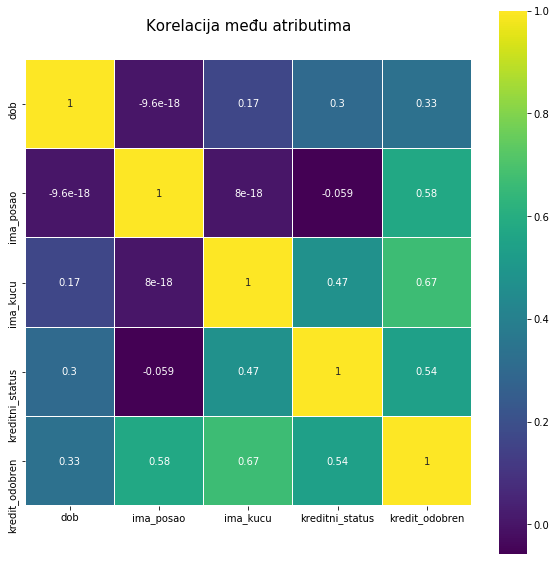

In [11]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Korelacija među atributima', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

izračunajmo *information gain* za svaki atribut:

In [12]:
inf_gain = {x: information_gain(df, x, 'kredit_odobren') for x in ['dob', 'ima_kucu', 'ima_posao', 'kreditni_status']}
inf_gain

{'dob': 0.08300749985576883,
 'ima_kucu': 0.4199730940219749,
 'ima_posao': 0.32365019815155627,
 'kreditni_status': 0.27998206268131653}

[Text(0,0,'dob'),
 Text(0,0,'ima_kucu'),
 Text(0,0,'ima_posao'),
 Text(0,0,'kreditni_status')]

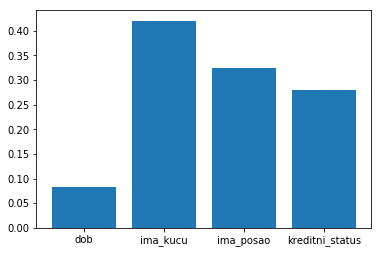

In [13]:
fig1, ax1 = plt.subplots()
ax1.bar(range(len(inf_gain)), list(inf_gain.values()), align='center')
ax1.set_xticks(range(len(inf_gain)))
ax1.set_xticklabels(list(inf_gain.keys()))

Vidimo da je to atribut *ima_kucu*, te njega odabiremo za korijen stabla. <br>
Vrijednost *da* atributa *ima_kucu* potpuno klasificira pripadnih 6 primjera u klasu *da*, pa će nam to biti list stabla.<br>
Vrijednost *ne* ima 9 primjera i to 6 u klasi *ne* i 3 u klasi *da* pa nastavljamo konstrukciju stabla u tom čvoru

Sada radimo podstablo nad preostalim podacima:

In [14]:
df_work = df_work.loc[df_work['ima_kucu'] == 'ne']

In [15]:
df_work

,dob,ima_posao,ima_kucu,kreditni_status,kredit_odobren
0,mlad,ne,ne,loš,ne
1,mlad,ne,ne,dobar,ne
2,mlad,da,ne,dobar,da
4,mlad,ne,ne,loš,ne
5,srednje_g,ne,ne,loš,ne
6,srednje_g,ne,ne,dobar,ne
12,stariji,da,ne,loš,da
13,stariji,da,ne,izvrstan,da
14,stariji,ne,ne,loš,ne


In [16]:
inf_gain_2 = {x: information_gain(df_work, x, 'kredit_odobren') for x in ['dob', 'ima_kucu', 'ima_posao', 'kreditni_status']}
inf_gain_2

{'dob': 0.2516291673878229,
 'ima_kucu': 0.0,
 'ima_posao': 0.9182958340544896,
 'kreditni_status': 0.21112605887668057}

[Text(0,0,'dob'),
 Text(0,0,'ima_kucu'),
 Text(0,0,'ima_posao'),
 Text(0,0,'kreditni_status')]

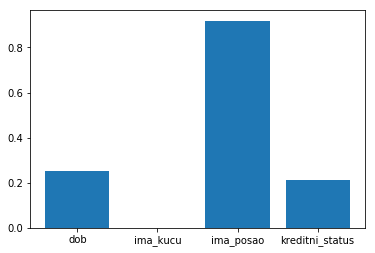

In [17]:
fig2, ax2 = plt.subplots()
ax2.bar(range(len(inf_gain_2)), list(inf_gain_2.values()), align='center')
ax2.set_xticks(range(len(inf_gain_2)))
ax2.set_xticklabels(list(inf_gain_2.keys()))

Vidimo da je sada najbolji izbor za čvor *ima_posao* <br>
vrijednost *ne* atributa *ima_posao* potpuno klasificira pripadnih 6 primjera u klsu *ne* <br>
ali isto tako i vrijednost *da* potpuno klsificira pripadnih 3 primjera u klasu *da*. 
Time smo odredili naše sablo odlučivanja koje sada izgleda ovako: 


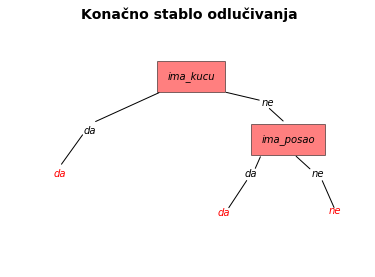

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig.suptitle('Konačno stablo odlučivanja', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
#fig.subplots_adjust(top=0.85)


ax.text(4.2, 8, 'ima_kucu', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

#ax.plot([2], [1], 'o')
ax.annotate('', xy=(2, 6), xytext=(4, 7.4),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))
ax.annotate('', xy=(7, 7), xytext=(5.9, 7.4),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))


ax.text(7, 6.8, 'ne', style='italic')
ax.annotate('', xy=(7.7, 6), xytext=(7.2,6.7),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))

ax.text(1.7, 5.5, 'da', style='italic')
ax.annotate('', xy=(1, 4), xytext=(1.7, 5.5),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))
ax.text(0.8, 3.5, 'da', style='italic', color="red")

ax.text(7, 5.1, 'ima_posao', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.annotate('', xy=(6.8,3.8), xytext=(7, 4.5),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))

ax.annotate('', xy=(8.5,3.8), xytext=(8, 4.5),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))


ax.text(8.5, 3.5, 'ne', style='italic')

ax.annotate('', xy=(9.2,2), xytext=(8.8, 3.4),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))

ax.text(9, 1.8, 'ne', style='italic', color="red")


ax.text(6.5, 3.5, 'da', style='italic')
ax.annotate('', xy=(6,2), xytext=(6.6, 3.4),
            arrowprops=dict(facecolor='black',  arrowstyle="-"))
ax.text(5.7, 1.7, 'da', style='italic' ,color="red")

ax.axis([0, 10, 0, 10])
plt.axis('off')
plt.show()

### Stablo odlučivanja u python paketu sklearn

Kreirati ćemo stablo odlučivanja na istim podacima kao i ranije, samo ćemo sada za to koristiti alate iz paketa *sklearn*.<br>
Klasa DecisionTreeClassifier koristi *Gini impuritiy* metriku kod kreiranja stabla odlučivanja.

In [19]:
from sklearn import tree
y_train = df['kredit_odobren']
x_train = df.drop(['kredit_odobren'], axis=1).values 

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(df.drop(['kredit_odobren'], axis=1)),
                              class_names = ['ne', 'da'],
                              rounded = True,
                              filled= True )

In [21]:
from subprocess import check_call
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

0

In [22]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage

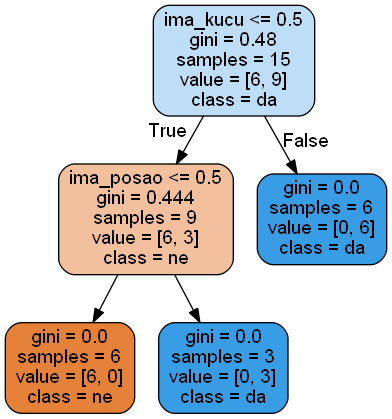

In [23]:
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
draw.text((10, 0),
          '', 
          (0,0,255)) 
img.save('sample-out.png')
PImage("sample-out.png")
